In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import datetime

In [97]:
df = pd.read_csv(
    'data/ECA_blended_custom/TG_STAID002759.txt', 
    skiprows=19, 
    skipinitialspace=True,
)

In [98]:
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53352,111448,20220127,44,0
53353,111448,20220128,49,0
53354,111448,20220129,58,0
53355,111448,20220130,58,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53357 entries, 0 to 53356
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   53357 non-null  int64
 1   DATE    53357 non-null  int64
 2   TG      53357 non-null  int64
 3   Q_TG    53357 non-null  int64
dtypes: int64(4)
memory usage: 1.6 MB


In [100]:
df.describe()

,SOUID,DATE,TG,Q_TG
count,53357.000000,5.335700e+04,53357.000000,53357.000000
mean,119357.653541,1.948610e+07,57.050415,0.032910
std,8023.826001,4.217116e+05,614.099351,0.543108
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,111448.000000,1.912071e+07,33.000000,0.000000
50%,111448.000000,1.949012e+07,94.000000,0.000000
75%,127488.000000,1.985072e+07,157.000000,0.000000
max,128124.000000,2.022013e+07,305.000000,9.000000


In [101]:
df.drop(['SOUID'], axis=1, inplace=True)

In [102]:
df['DATE'] = df['DATE'].astype(str)
df.set_index(pd.to_datetime(df['DATE']), inplace= True)
df.drop(['DATE'], axis=1, inplace=True)

In [103]:
df['T'] = df['TG']*0.1
df.drop(['TG','Q_TG'], axis=1, inplace=True)

In [104]:
df

,T
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-01-27,4.4
2022-01-28,4.9
2022-01-29,5.8


# Train - Test Split

In [105]:
df_train = pd.DataFrame.copy(df.loc['2016-01-01':'2020-12-31']).asfreq('d')
df_test = pd.DataFrame.copy(df.loc['2021-01-01':]).asfreq('d')

# ARIMA

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

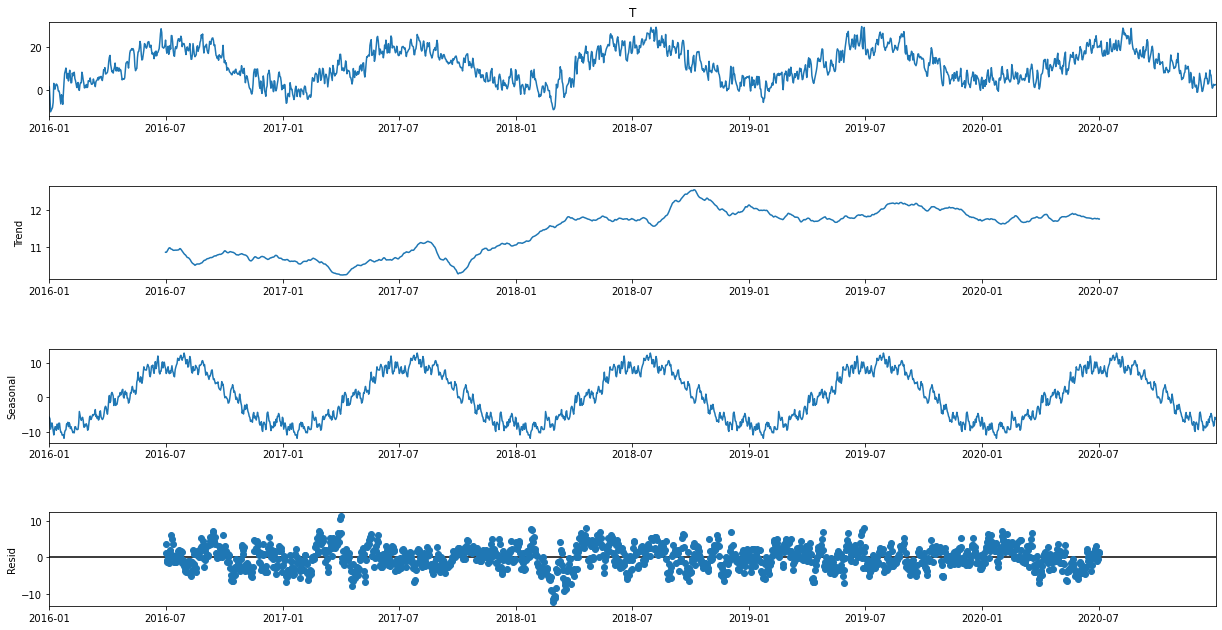

In [107]:
decomposed_T = seasonal_decompose(df_train['T'],period=365)
fig = decomposed_T.plot()
fig.set_size_inches(19,10)

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/maria/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


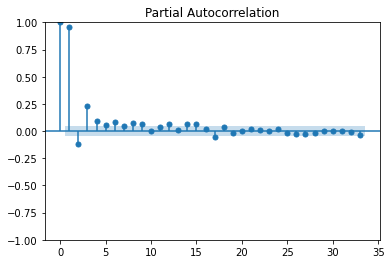

In [109]:
plot_pacf(df_train['T']);

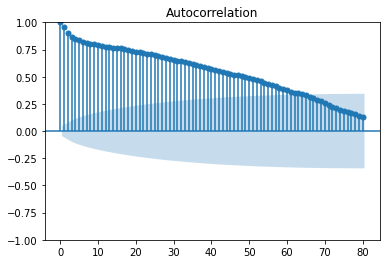

In [110]:
plot_acf(df_train['T'],lags=80);

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [122]:
sarimax_model = SARIMAX(df_train['T'], order=(3, 1, 1))

In [123]:
sarimax_model_fit = sarimax_model.fit(maxiter=1000)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19571D+00    |proj g|=  4.55068D-03

At iterate    5    f=  2.19238D+00    |proj g|=  4.51280D-02

At iterate   10    f=  2.17805D+00    |proj g|=  2.39155D-02

At iterate   15    f=  2.17695D+00    |proj g|=  1.65952D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   5.107D-06   2.177D+00
  F =   2.1769505001492875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [125]:
print(sarimax_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      T   No. Observations:                 1827
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -3977.289
Date:                Tue, 31 May 2022   AIC                           7964.577
Time:                        11:57:51   BIC                           7992.127
Sample:                    01-01-2016   HQIC                          7974.739
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9135      0.037     24.965      0.000       0.842       0.985
ar.L2         -0.3413      0.031    -11.021      0.000      -0.402      -0.281
ar.L3          0.0984      0.029      3.416      0.0

In [126]:
residuals = pd.DataFrame(sarimax_model_fit.resid)

<AxesSubplot:ylabel='Density'>

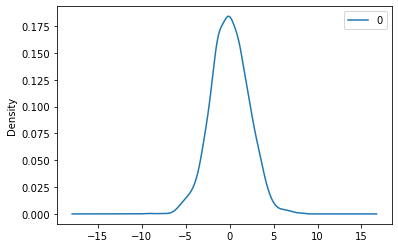

In [127]:
residuals.plot(kind='kde')

In [128]:
residuals.describe()

,0
count,1827.000000
mean,0.005835
std,2.137691
min,-9.267381
25%,-1.408286
50%,-0.032424
75%,1.405836
max,8.056690


In [129]:
df_train.asfreq('D')

,T
DATE,
2016-01-01,1.6
2016-01-02,-3.6
2016-01-03,-9.8
2016-01-04,-9.1
2016-01-05,-8.4
...,...
2020-12-27,1.6
2020-12-28,2.8
2020-12-29,2.3


In [ ]:
history = df_train.asfreq('D')
daily_predictions = []
for i,residual_T in enumerate(df_train.asfreq('D')['T']):
	#print(residual_T)
	model = SARIMAX(history, order=(3, 1, 7), freq='D')
	model_fit = model.fit()
	output = model_fit.forecast()
	#print('output:')
	#print(pd.DataFrame({'remainder':output[0]}, index=output.index))
	history = pd.concat([history,pd.DataFrame({'T':residual_T}, index=output.index).asfreq('d')])
	yhat = output[0]
	daily_predictions.append(yhat)
	print('predicted=%f, expected=%f' % (yhat, residual_T))

In [132]:
history

,T
2016-01-01,1.6
2016-01-02,-3.6
2016-01-03,-9.8
2016-01-04,-9.1
2016-01-05,-8.4
...,...
2021-11-20,6.3
2021-11-21,6.7
2021-11-22,9.7
2021-11-23,9.8


In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [135]:
results = df_test.iloc[:328].copy()
results['total'] = results['T'] 
results['predictions'] = daily_predictions 

MAE: 3.56
RMSE: 4.67


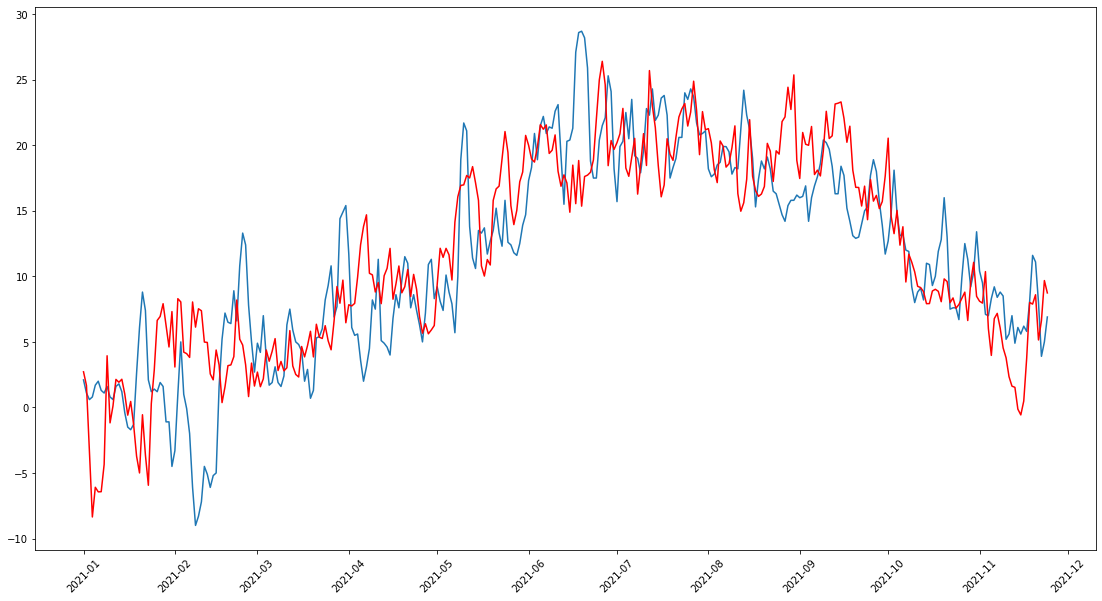

In [138]:
mae = mean_absolute_error(results['total'], results['predictions'])
print('MAE: %.2f' % mae)
rmse = np.sqrt(mean_squared_error(results['total'], results['predictions']))
print('RMSE: %.2f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(19,10))
plt.plot(results['total'])
plt.plot(results['predictions'], color='red')
plt.xticks(rotation=45)
plt.show()